<a href="https://colab.research.google.com/github/kush450629/ME421_GROUP_A1/blob/main/Heat%20Transfer/ME421_E20048_HVAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INTRODUCTION

### Problem Statement

A factory involved in the manufacturing of dairy products is required to store milk received from collecting centers in a cool room until delivery to the factory the following day. Aluminum containers are received at approximately 1400 hrs. The average temperature of the collected milk ranges from 35°C to 40°C. The system is required to cool the bulk to 15°C within two hours and maintain that temperature until the delivery time at 1400 hrs the next day.

**Design Data:**
* **Number of milk containers collected per day:** 40
* **Weight of an empty container:** 2 kg
* **Weight of milk in a container:** 5 kg
* **Specific heat capacity of the container material:** 921.1 J/kg·K
* **Specific heat capacity of milk:** 4000 J/kg·K

As the engineering team, the objective is to analyze the suitability of the available Air Conditioning unit at the Heat Engine Laboratory for this purpose by performing the following:

1.  Propose a methodology to evaluate the feasibility of the available unit.
2.  Conduct experiments with the laboratory cooling unit to obtain necessary performance data.
3.  Determine the developments or modifications required if the capacity is increased to store 80 milk containers per day.
4.  Compile a comprehensive report on the findings and engineering recommendations.

### Cooling Load Calculation for Milk Storage

### 1. System Parameters
* **Number of containers ($n$):** 40
* **Mass of milk per container ($m_m$):** 5 kg
* **Mass of empty container ($m_c$):** 2 kg
* **Specific heat of milk ($c_m$):** $4000\text{ J/kg}\cdot\text{K}$
* **Specific heat of aluminum ($c_c$):** $921.1\text{ J/kg}\cdot\text{K}$
* **Target temperature ($T_f$):** $15^\circ\text{C}$
* **Cooling time ($t$):** 2 hours ($7200\text{ seconds}$)

---

### 2. Case A: Average Initial Temperature ($T_i = 37.5^\circ\text{C}$)
*Calculated for the $35^\circ\text{C} - 40^\circ\text{C}$ range.*

**Total Heat Removal ($Q$):**
$$Q = n \times [(m_m \cdot c_m + m_c \cdot c_c) \times (T_i - T_f)]$$
$$Q = 40 \times [(5 \cdot 4000 + 2 \cdot 921.1) \times (37.5 - 15)]$$
$$Q = 19,657,980\text{ J} \approx 19.66\text{ MJ}$$

**Required Cooling Load ($\dot{Q}$):**
$$\dot{Q} = \frac{Q}{t} = \frac{19,657,980}{7200}$$
**$$\dot{Q}_{avg} \approx 2.73\text{ kW}$$**

---

### 3. Case B: Maximum Initial Temperature ($T_i = 40^\circ\text{C}$)
*Calculated for the worst-case scenario.*

**Total Heat Removal ($Q$):**
$$Q = 40 \times [(5 \cdot 4000 + 2 \cdot 921.1) \times (40 - 15)]$$
$$Q = 21,842,200\text{ J} \approx 21.84\text{ MJ}$$

**Required Cooling Load ($\dot{Q}$):**
$$\dot{Q} = \frac{Q}{t} = \frac{21,842,200}{7200}$$
**$$\dot{Q}_{max} \approx 3.03\text{ kW}$$**

In [ ]:
# Parameters from the laboratory problem statement
n_containers = 40          # Number of containers [cite: 26]
m_container = 2            # Weight of an empty container in kg [cite: 27]
m_milk = 5                 # Weight of milk per container in kg [cite: 28]
cp_container = 921.1       # Specific heat of aluminum in J/kgK [cite: 29]
cp_milk = 4000.0           # Specific heat of milk in J/kgK [cite: 30]
t_target = 15.0            # Target storage temperature in Celsius [cite: 24]
cooling_time_hours = 2     # Required cooling duration [cite: 24]

# Time conversion to seconds
cooling_time_sec = cooling_time_hours * 3600

def calculate_load(t_initial):
    """
    Calculates the cooling load in kW for a given initial temperature.
    """
    # Total heat to be removed = (Heat from milk + Heat from containers)
    # Q = m * cp * Delta_T
    q_milk = n_containers * (m_milk * cp_milk * (t_initial - t_target))
    q_container = n_containers * (m_container * cp_container * (t_initial - t_target))

    total_q_joules = q_milk + q_container

    # Load (Power) = Energy / Time
    load_watts = total_q_joules / cooling_time_sec
    return load_watts / 1000  # Convert to kW

# Scenarios based on initial milk temperature range (35C - 40C) [cite: 23]
t_avg = (35 + 40) / 2
t_max = 40.0

load_avg = calculate_load(t_avg)
load_max = calculate_load(t_max)

print(f"--- Cooling Load Results ---")
print(f"Initial Temp: 37.5°C (Average) -> Load: {load_avg:.3f} kW")
print(f"Initial Temp: 40.0°C (Maximum) -> Load: {load_max:.3f} kW")

--- Cooling Load Results ---
Initial Temp: 37.5°C (Average) -> Load: 2.730 kW
Initial Temp: 40.0°C (Maximum) -> Load: 3.034 kW


# THEORY

### Experimental Methodology for Unit Evaluation

This procedure outlines the experimental approach to determine the actual cooling capacity ($\dot{Q}_{act}$) of the laboratory unit and assess its feasibility for the specified milk cooling task.

---

### 1. Measurement Parameters
To analyze the system, the following physical and thermodynamic properties must be measured:

* **Duct Geometry:** Measure the width ($w$) and height ($h$) of the air intake duct to calculate the cross-sectional area ($A = w \times h$).
* **Air Velocity ($v$):** Use an anemometer to measure the air velocity at the intake. Multiple readings should be averaged to account for non-uniform flow.
* **Psychrometric States:** Measure the **Dry Bulb Temperature ($T_{db}$)** and **Wet Bulb Temperature ($T_{wb}$)** at:
    * **State 1 (Inlet):** Ambient air entering the evaporator.
    * **State 2 (Outlet):** Conditioned air exiting the evaporator.

---

### 2. Psychrometric Theory
The actual cooling capacity depends on the state of the moist air. Since air is a mixture of dry air and water vapor, its total heat content (enthalpy) is the sum of sensible heat (temperature change) and latent heat (phase change of moisture).



**Vapor Pressure and Humidity Ratio:**
To find the specific enthalpy ($h$), we first determine the humidity ratio ($\omega$), which represents the mass of water vapor per unit mass of dry air. This is calculated using the saturation vapor pressure ($P_{swb}$) at the wet bulb temperature via the Magnus-Tetens approximation:
$$P_{swb} = 0.61078 \exp\left(\frac{17.27 \cdot T_{wb}}{T_{wb} + 237.3}\right)$$
The actual vapor pressure ($P_v$) is then derived by accounting for the depression between dry and wet bulb temperatures:
$$P_v = P_{swb} - 0.000662 \cdot P_{atm} \cdot (T_{db} - T_{wb})$$
Finally, the humidity ratio ($\omega$) is determined:
$$\omega = 0.62194 \cdot \frac{P_v}{P_{atm} - P_v}$$

**Specific Enthalpy Calculation:**
The total enthalpy ($h$) in kJ/kg is calculated using the following energy balance:
$$h = c_{pa} T_{db} + \omega (h_{fg} + c_{pv} T_{db})$$
Where:
* $c_{pa} \approx 1.006 \text{ kJ/kg}\cdot\text{K}$ (Specific heat of dry air)
* $h_{fg} \approx 2501 \text{ kJ/kg}$ (Enthalpy of vaporization at $0^\circ\text{C}$)
* $c_{pv} \approx 1.86 \text{ kJ/kg}\cdot\text{K}$ (Specific heat of water vapor)

---

### 3. Thermodynamic Calculations
The performance of the unit is governed by the total enthalpy change of the air stream as it passes through the evaporator.



**Mass Flow Rate of Air ($\dot{m}_a$):**
$$\dot{m}_a = \rho \cdot A \cdot v$$
*Where $\rho \approx 1.2 \text{ kg/m}^3$ (density of air at STP).*

**Actual Cooling Capacity ($\dot{Q}_{act}$):**
The total heat removal rate is the product of the mass flow rate and the enthalpy drop across the evaporator:
$$\dot{Q}_{act} = \dot{m}_a \times (h_{in} - h_{out})$$

---

### 4. Data Collection Table

| Parameter | Symbol | Unit | Value |
| :--- | :--- | :--- | :--- |
| Duct Area | $A$ | $m^2$ | |
| Avg. Air Velocity | $v$ | $m/s$ | |
| Inlet Enthalpy | $h_{in}$ | $kJ/kg$ | |
| Outlet Enthalpy | $h_{out}$ | $kJ/kg$ | |
| **Actual Cooling Capacity** | **$\dot{Q}_{act}$** | **kW** | |

---

### 5. Feasibility Criteria
The unit is deemed suitable if its actual capacity meets the maximum required load calculated for the factory conditions:
* **Target Load (Max):** $3.03 \text{ kW}$
* **Decision Rule:**
    * If $\dot{Q}_{act} \geq 3.03 \text{ kW}$: **Suitable.**
    * If $\dot{Q}_{act} < 3.03 \text{ kW}$: **Insufficient; developments required.**

#OBSERVATIONS

### Experimental Data and Analysis of Fan Speed Performance

This section presents the data obtained at different evaporator fan speeds. The experiment was conducted with the cold room open to maintain a stable inlet condition while varying the air flow rate to determine the setting for maximum heat removal.

### 1. Column Descriptions (Nomenclature)
To interpret the data correctly, the temperature sensors are defined as follows:
* **$D_1$**: internal diameter of return air duct (m)
* **$D_1$**: internal diameter of cool air inlet duct (m)
* **$T_1$**: Return air dry bulb temperature ($^\circ$C)
* **$T_2$**: Return air wet bulb temperature ($^\circ$C)
* **$T_3$**: Evaporator inlet dry bulb temperature ($^\circ$C)
* **$T_4$**: Evaporator inlet wet bulb temperature ($^\circ$C)
* **$T_5$**: Evaporator exit dry bulb temperature ($^\circ$C)
* **$T_6$**: Evaporator exit wet bulb temperature ($^\circ$C)
* **$V_{in}$ / $V_{out}$**: Air velocity at intake and exit (m/s)

---

### 2. Recorded Experimental Data
D_1 = 0.11 m

| Fan Speed | $T_1$ | $T_2$ | $T_3$ | $T_4$ | $T_5$ | $T_6$ | $V_{in}$ | $V_{out}$ |
| :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- |
| **1** | 29.5 | 25.2 | 29.1 | 21.2 | 26.4 | 19.9 | 0.0 | 0.0 |
| **2** | 29.5 | 25.3 | 29.1 | 21.1 | 26.7 | 20.0 | 0.0 | 0.0 |
| **3** | 29.9 | 25.3 | 29.5 | 21.5 | 24.3 | 19.7 | 0.6 | 0.5 |
| **4** | 30.0 | 24.9 | 29.6 | 21.8 | 20.4 | 16.6 | 2.8 | 2.6 |
| **5** | 29.2 | 23.7 | 29.3 | 21.2 | 20.8 | 16.2 | 5.6 | 5.4 |
| **6** | 29.2 | 23.3 | 29.3 | 21.1 | 21.4 | 18.0 | 8.8 | 8.1 |
| **7** | 29.4 | 23.2 | 29.3 | 21.1 | 21.5 | 18.2 | 9.3 | 8.4 |
| **8** | 29.0 | 23.1 | 29.1 | 21.0 | 21.2 | 17.6 | 9.6 | 8.5 |
| **9** | 28.7 | 22.9 | 28.9 | 20.9 | 21.3 | 17.4 | 9.8 | 8.7 |
| **10** | 29.4 | 23.2 | 29.3 | 21.1 | 19.9 | 16.5 | 9.5 | 9.1 |

---



# GRAPHS AND CALCULATIONS

<>:14: SyntaxWarning: invalid escape sequence '\c'
<>:14: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipython-input-1921871544.py:14: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('Temperature $T_5$ ($^\circ$C)', fontsize=12)


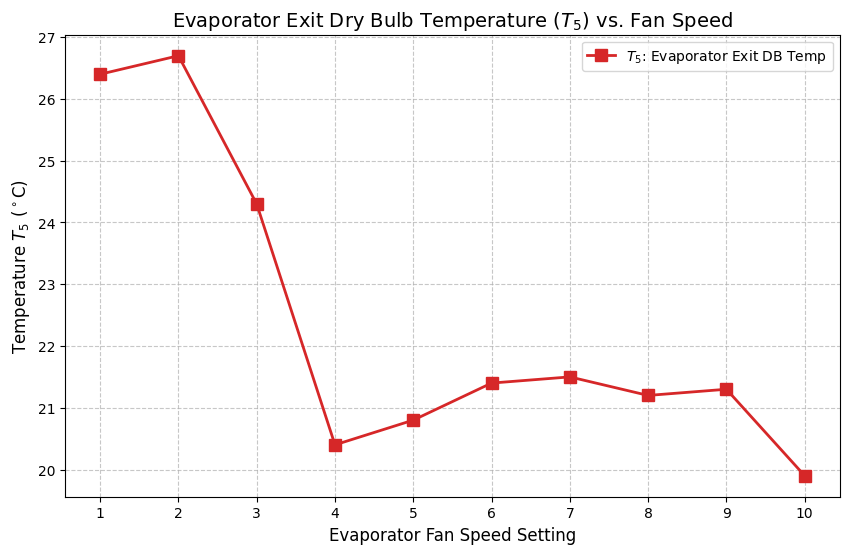

In [ ]:
import matplotlib.pyplot as plt

# Experimental Data from Table
fan_speeds = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
t5_values = [26.4, 26.7, 24.3, 20.4, 20.8, 21.4, 21.5, 21.2, 21.3, 19.9]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(fan_speeds, t5_values, marker='s', linestyle='-', color='tab:red', linewidth=2, markersize=8)

# Add labels and title using LaTeX formatting
plt.title('Evaporator Exit Dry Bulb Temperature ($T_5$) vs. Fan Speed', fontsize=14)
plt.xlabel('Evaporator Fan Speed Setting', fontsize=12)
plt.ylabel('Temperature $T_5$ ($^\circ$C)', fontsize=12)

# Set x-axis ticks to match fan speed settings exactly
plt.xticks(fan_speeds)

# Add grid and legend
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(['$T_5$: Evaporator Exit DB Temp'], loc='upper right')

# Display the plot
plt.show()

## Experimental Analysis and Thermodynamic Logic

This section details the mathematical framework used to evaluate the cooling capacity of the laboratory unit based on the experimental data obtained.

---

### Mass Flow Rate of Air ($\dot{m}_a$)
The mass flow rate is the foundational parameter for calculating heat transfer. It is derived from the air velocity measured at the intake:

$$\dot{m}_a = \rho \cdot A \cdot V_{in}$$

* **$\rho$**: Density of air ($\approx 1.2 \text{ kg/m}^3$).
* **$A$**: Cross-sectional area of the duct ($m^2$).
* **$V_{in}$**: Measured air intake velocity ($m/s$).

---

### Calculation of Specific Enthalpy ($h$)
To determine the total energy (sensible and latent heat) removed from the air, we use the measured Dry Bulb ($T_{db}$) and Wet Bulb ($T_{wb}$) temperatures.

#### **Step A: Saturation Vapor Pressure ($P_{swb}$)**
Using the Magnus-Tetens approximation at the Wet Bulb temperature:
$$P_{swb} = 0.61078 \cdot \exp\left(\frac{17.27 \cdot T_{wb}}{T_{wb} + 237.3}\right)$$

#### **Step B: Actual Vapor Pressure ($P_v$)**
Applying the psychrometric formula to account for the evaporative cooling effect:
$$P_v = P_{swb} - 0.000662 \cdot P_{atm} \cdot (T_{db} - T_{wb})$$
* **$P_{atm}$**: Atmospheric pressure ($101.325 \text{ kPa}$).

#### **Step C: Humidity Ratio ($\omega$)**
$$\omega = 0.62194 \cdot \frac{P_v}{P_{atm}-P_v}$$

#### **Step D: Specific Enthalpy ($h$)**
The total enthalpy in $\text{kJ/kg}$ of dry air is calculated as:
$$h = (c_{p,a} \cdot T_{db}) + \omega \cdot (h_{fg} + c_{p,v} \cdot T_{db})$$

* **$c_{p,a}$**: $1.006 \text{ kJ/kg}\cdot\text{K}$ (Specific heat of dry air).
* **$h_{fg}$**: $2501 \text{ kJ/kg}$ (Latent heat of vaporization).
* **$c_{p,v}$**: $1.86 \text{ kJ/kg}\cdot\text{K}$ (Specific heat of water vapor).



---

### Determination of Heat Removal Rate ($\dot{Q}$)
The experimental cooling capacity is defined by the enthalpy difference between the **Return Air** (Inlet) and the **Evaporator Exit** (Outlet):

$$\dot{Q} = \dot{m}_a \cdot (h_{in} - h_{out})$$

* **$h_{in}$**: Calculated using $T_1$ (Return DB) and $T_2$ (Return WB).
* **$h_{out}$**: Calculated using $T_5$ (Exit DB) and $T_6$ (Exit WB).

---




<>:52: SyntaxWarning: invalid escape sequence '\d'
<>:52: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-155558524.py:52: SyntaxWarning: invalid escape sequence '\d'
  plt.title('Total Heat Removed ($\dot{Q}$) vs. Fan Speed (Inlet: $T_1, T_2$)', fontsize=14)


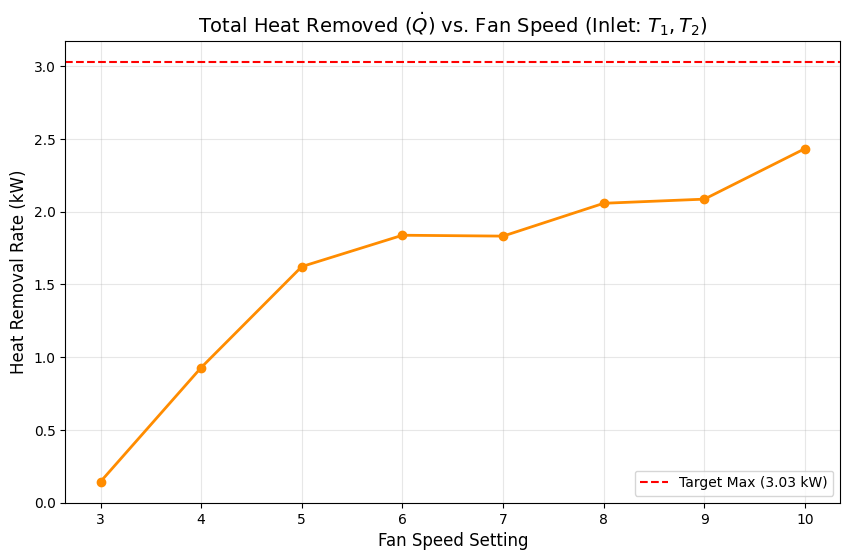

   fan_speed  V_in  Q_dot_kW
0          3   0.6  0.144262
1          4   2.8  0.928436
2          5   5.6  1.622419
3          6   8.8  1.837842
4          7   9.3  1.831778
5          8   9.6  2.057423
6          9   9.8  2.085847
7         10   9.5  2.433180


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Experimental Data
data = {
    "fan_speed": [3, 4, 5, 6, 7, 8, 9, 10],
    "T1_db_in": [29.9, 30.0, 29.2, 29.2, 29.4, 29.0, 28.7, 29.4], # Return Air DB
    "T2_wb_in": [25.3, 24.9, 23.7, 23.3, 23.2, 23.1, 22.9, 23.2], # Return Air WB
    "T5_db_out": [24.3, 20.4, 20.8, 21.4, 21.5, 21.2, 21.3, 19.9], # Exit DB
    "T6_wb_out": [19.7, 16.6, 16.2, 18.0, 18.2, 17.6, 17.4, 16.5], # Exit WB
    "V_in": [0.6, 2.8, 5.6, 8.8, 9.3, 9.6, 9.8, 9.5]
}

df = pd.DataFrame(data)

# 2. Thermodynamic Constants
P_atm = 101.325  # Atmospheric Pressure (kPa)
rho_air = 1.2    # Density of air (kg/m3)
D_1 = 0.11       # (m)
A_duct = np.pi*(D_1**2 )/4    # UPDATE THIS: Measured Duct Area (m2)

def get_enthalpy(T_db, T_wb):
    """Calculates specific enthalpy (kJ/kg) using psychrometric equations."""
    # Saturation Vapor Pressure at T_wb
    P_swb = 0.61078 * np.exp((17.27 * T_wb) / (T_wb + 237.3))

    # Actual Vapor Pressure (Psychrometric Formula)
    P_v = P_swb - 0.000662 * P_atm * (T_db - T_wb)

    # Humidity Ratio (w)
    w = 0.62194 * P_v / (P_atm - P_v)

    # Enthalpy (h) in kJ/kg
    h = 1.006 * T_db + w * (2501 + 1.86 * T_db)
    return h

# 3. Calculations
df['h_in'] = df.apply(lambda row: get_enthalpy(row['T1_db_in'], row['T2_wb_in']), axis=1)
df['h_out'] = df.apply(lambda row: get_enthalpy(row['T5_db_out'], row['T6_wb_out']), axis=1)

# Mass flow rate (kg/s)
df['m_dot'] = rho_air * A_duct * df['V_in']

# Cooling Load (kW)
df['Q_dot_kW'] = df['m_dot'] * (df['h_in'] - df['h_out'])

# 4. Visualization
plt.figure(figsize=(10, 6))
plt.plot(df['fan_speed'], df['Q_dot_kW'], marker='o', color='darkorange', linewidth=2)

plt.title('Total Heat Removed ($\dot{Q}$) vs. Fan Speed (Inlet: $T_1, T_2$)', fontsize=14)
plt.xlabel('Fan Speed Setting', fontsize=12)
plt.ylabel('Heat Removal Rate (kW)', fontsize=12)
plt.axhline(y=3.03, color='red', linestyle='--', label='Target Max (3.03 kW)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

print(df[['fan_speed', 'V_in', 'Q_dot_kW']])

##  Preliminary Conclusion and Experimental Transition

Based on the analysis of the exit temperatures ($T_5, T_6$) and the calculated heat removal rates ($\dot{Q}$) across the various fan speed settings, the following conclusions are drawn:

---

###  Optimization of Fan Speed
* **Performance Peak:** From the experimental graphs, it is evident that the maximum heat removal performance is obtained at the **maximum evaporator fan speed**.
* **Operational Setting:** Although air velocity peaked slightly at speed 9, the lowest exit temperatures ($T_5 = 19.9^\circ\text{C}$ and $T_6 = 16.5^\circ\text{C}$) were recorded at **Speed 10**, indicating the most effective cooling of the air stream.
* **Mass Flow Benefit:** The significantly higher mass flow rate ($\dot{m}_a$) at the highest settings outweighs the reduction in air-evaporator contact time, leading to the highest net cooling capacity in kW.
* **Compared to target value** The rate of heat removal by the cooling system is observed to be below the target values of $2.73 kW$ and $3.

---

###  Next Step: Closed-Door Cooling Rate Test
Having identified the optimal fan speed for heat exchange, the next phase of the experiment will evaluate the unit's ability to cool the room volume under realistic operational conditions.

* **Objective:** To determine the actual cooling rate ($\frac{dT}{dt}$) of the storage environment.
* **Procedure:** The cooling room door will be closed, and the unit will be operated at the identified **maximum fan speed**.
* **Data Collection:** Temperature decay over time will be recorded to assess the unit's ability to reach the target storage temperature of $15^\circ\text{C}$ within the required two-hour window.

#OBSERVATIONS

## Experiment 02: Closed-Door Cooling Rate Study

This stage of the laboratory involves monitoring the thermal behavior of the cooling room under closed-door conditions to evaluate the actual pull-down performance of the unit.

###  Experimental Data and Observations
The unit was operated at the optimum evaporator fan speed (**Speed 10**) identified in Experiment 01. Consequently, the air intake velocity remains constant at **$V_{in} = 9.5$ m/s**, as measured during the previous optimization phase.

The following table presents the temperature measurements recorded at 1-minute intervals for the evaporator inlet ($T_3, T_4$) and exit ($T_5, T_6$):

| Time (min) | $T_3$ (°C) | $T_4$ (°C) | $T_5$ (°C) | $T_6$ (°C) |
|:---:|:---:|:---:|:---:|:---:|
| 1 | 27.4 | 19.9 | 20.3 | 16.4 |
| 2 | 27.0 | 19.6 | 20.2 | 16.4 |
| 3 | 26.7 | 19.3 | 20.0 | 16.2 |
| 4 | 26.4 | 18.9 | 19.8 | 16.1 |
| 5 | 26.1 | 18.7 | 19.7 | 16.0 |
| 6 | 25.9 | 18.5 | 19.5 | 15.8 |
| 7 | 25.7 | 18.3 | 19.3 | 15.6 |
| 8 | 25.5 | 18.2 | 19.2 | 15.5 |
| 9 | 25.4 | 18.0 | 18.9 | 15.4 |
| 10 | 25.2 | 17.9 | 18.8 | 15.3 |
| 11 | 25.1 | 17.7 | 18.7 | 15.2 |
| 12 | 24.9 | 17.6 | 18.6 | 15.0 |
| 13 | 24.8 | 17.5 | 18.4 | 15.0 |
| 14 | 24.6 | 17.4 | 18.4 | 14.9 |
| 15 | 24.5 | 17.3 | 18.2 | 14.8 |

---

### Mathematical Framework for Instantaneous Cooling Rate Calculation

To determine the cooling capacity at each time interval, the following thermodynamic sequence is applied:

**Step 1: Calculate Constant Mass Flow Rate ($\dot{m}_a$)**
Using the optimum velocity from Experiment 01 ($V_{in} = 9.5$ m/s) and the measured circular duct area ($A \approx 0.0095$ m$^2$):
$$\dot{m}_a = \rho \cdot A \cdot V_{in}$$
*Where $\rho \approx 1.2$ kg/m$^3$.*

**Step 2: Determine Instantaneous Specific Enthalpy ($h_{t}$)**
For each time step ($t$), specific enthalpy is calculated for both the inlet ($T_3, T_4$) and outlet ($T_5, T_6$) using the theory used previously.


**Step 3: Calculate Instantaneous Heat Removal Rate ($\dot{Q}_t$)**
The total heat removal rate (cooling capacity) at any given second is the product of the mass flow rate and the enthalpy drop across the evaporator:
$$\dot{Q}_t = \dot{m}_a \cdot (h_{in,t} - h_{out,t})$$





# GRAPHS AND CALCULATIONS

<>:46: SyntaxWarning: invalid escape sequence '\d'
<>:47: SyntaxWarning: invalid escape sequence '\d'
<>:53: SyntaxWarning: invalid escape sequence '\c'
<>:46: SyntaxWarning: invalid escape sequence '\d'
<>:47: SyntaxWarning: invalid escape sequence '\d'
<>:53: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipython-input-2691640754.py:46: SyntaxWarning: invalid escape sequence '\d'
  ax1.set_ylabel('Heat Removal Rate ($\dot{Q}$) (kW)', color='tab:red', fontsize=12)
/tmp/ipython-input-2691640754.py:47: SyntaxWarning: invalid escape sequence '\d'
  line1, = ax1.plot(time, q_dot, color='tab:red', marker='o', label='Heat Removal Rate ($\dot{Q}$)')
/tmp/ipython-input-2691640754.py:53: SyntaxWarning: invalid escape sequence '\c'
  ax2.set_ylabel('Cooling Rate ($dT/dt$) ($^\circ$C/min)', color='tab:blue', fontsize=12)


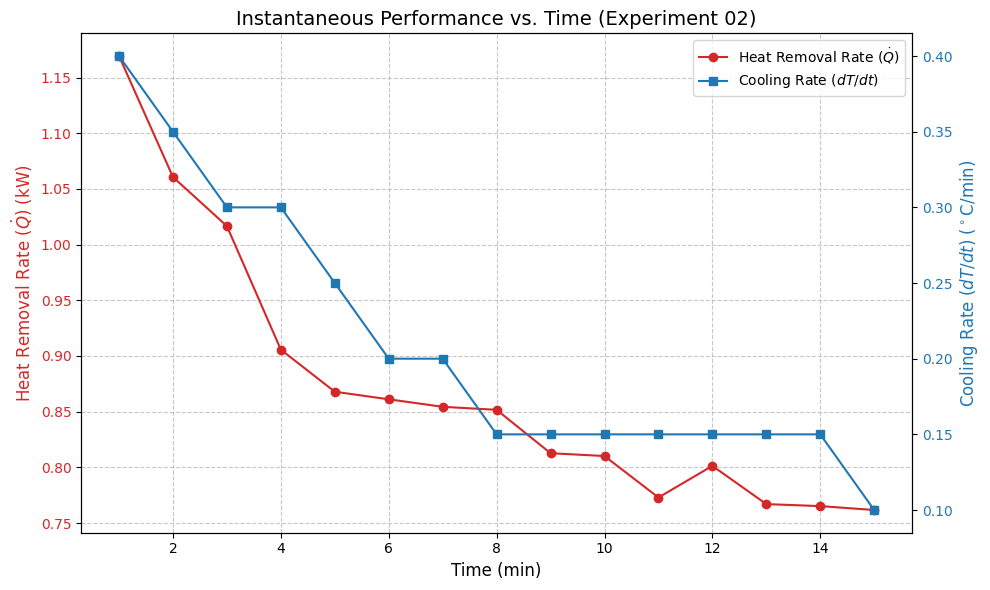

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Experimental Data from Experiment 02
time = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
t3 = np.array([27.4, 27.0, 26.7, 26.4, 26.1, 25.9, 25.7, 25.5, 25.4, 25.2, 25.1, 24.9, 24.8, 24.6, 24.5])
t4 = np.array([19.9, 19.6, 19.3, 18.9, 18.7, 18.5, 18.3, 18.2, 18.0, 17.9, 17.7, 17.6, 17.5, 17.4, 17.3])
t5 = np.array([20.3, 20.2, 20.0, 19.8, 19.7, 19.5, 19.3, 19.2, 18.9, 18.8, 18.7, 18.6, 18.4, 18.4, 18.2])
t6 = np.array([16.4, 16.4, 16.2, 16.1, 16.0, 15.8, 15.6, 15.5, 15.4, 15.3, 15.2, 15.0, 15.0, 14.9, 14.8])

# 2. Constants
P_atm = 101.325  # kPa
rho = 1.2        # kg/m3
d_duct = 0.11    # m
v_in = 9.5       # m/s (from optimum fan speed setting 10)
A = np.pi * (d_duct**2) / 4
m_dot = rho * A * v_in # kg/s

def calc_enthalpy(db, wb):
    # Saturation Vapor Pressure at Wet Bulb (Magnus-Tetens)
    p_swb = 0.61078 * np.exp((17.27 * wb) / (wb + 237.3))
    # Actual Vapor Pressure
    p_v = p_swb - 0.000662 * P_atm * (db - wb)
    # Humidity Ratio
    w = 0.62194 * p_v / (P_atm - p_v)
    # Enthalpy (kJ/kg)
    h = 1.006 * db + w * (2501 + 1.86 * db)
    return h

# 3. Calculations
h_in = np.array([calc_enthalpy(db, wb) for db, wb in zip(t3, t4)])
h_out = np.array([calc_enthalpy(db, wb) for db, wb in zip(t5, t6)])

# Heat removal rate (kW)
q_dot = m_dot * (h_in - h_out)

# Rate of cooling (degC / min)
dt_dt = -np.gradient(t3, time) # Negative gradient for falling temperature

# 4. Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Heat Removal Rate on Primary Axis
ax1.set_xlabel('Time (min)', fontsize=12)
ax1.set_ylabel('Heat Removal Rate ($\dot{Q}$) (kW)', color='tab:red', fontsize=12)
line1, = ax1.plot(time, q_dot, color='tab:red', marker='o', label='Heat Removal Rate ($\dot{Q}$)')
ax1.tick_params(axis='y', labelcolor='tab:red')
ax1.grid(True, linestyle='--', alpha=0.7)

# Create Secondary Axis for Cooling Rate
ax2 = ax1.twinx()
ax2.set_ylabel('Cooling Rate ($dT/dt$) ($^\circ$C/min)', color='tab:blue', fontsize=12)
line2, = ax2.plot(time, dt_dt, color='tab:blue', marker='s', label='Cooling Rate ($dT/dt$)')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Instantaneous Performance vs. Time (Experiment 02)', fontsize=14)
lines = [line1, line2]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper right')

plt.tight_layout()
plt.savefig('cooling_performance_plot.png')

In [3]:
# 5. Summary Statistics for Experiment 02
peak_q_dot = np.max(q_dot)
mean_q_dot = np.mean(q_dot)

print(f"--- Experiment 02 Summary Results ---")
print(f"Peak Rate of Heat Removal: {peak_q_dot:.4f} kW")
print(f"Mean Rate of Heat Removal: {mean_q_dot:.4f} kW")

--- Experiment 02 Summary Results ---
Peak Rate of Heat Removal: 1.1693 kW
Mean Rate of Heat Removal: 0.8719 kW


# DISCUSSION


### Erros and justifications:
Only the return air inlet velocity os considered for air flowrate calculation as there is a significant drop in the air velocity on the cooled air outlet when measured. This is mainly because the loss is high when a fluid flow is released into a still reservoir compared to getting sucked into a duct from a still reservoir of fluid. Hence when the flow speed meter is placed in front of the duct openings to the cold room, it is obvious to read a lesser value on the cool air outlet compared to the return air inlet. In addition, the true air flow velocity inside the ducts are still higher thatn the inlet velocity too as it is measured just before entering the duct.
If an average was obtained it would significantly reduce the accuracy of the performance testing.

In the procedure followed, using the mathematical evaluation of psychrometric properties is more accurate and convenient with the use of python in the colab environment than using psychrometric charts to find the state properties of air at inlet and outlet.

### Reasoning and Performance Analysis:

The cooling capacity of the unit is determined by analyzing the air as it passes through the evaporator (from State $T_3, T_4$ to State $T_5, T_6$).

* **Evaporator Performance**: The actual heat removal occurs between the **Evaporator Inlet** ($T_3, T_4$) and the **Evaporator Exit** ($T_5, T_6$). The difference in wet bulb temperatures ($T_4 - T_6$) represents the total enthalpy drop (sensible + latent heat) of the air stream.
* **Mass Flow Influence**: As the fan speed increases, the intake velocity ($V_{in}$) rises to a peak of $9.8$ m/s at Speed 9. This significantly increases the air mass flow rate ($\dot{m}_a$), which is a primary driver of the total cooling load ($\dot{Q} = \dot{m}_a \Delta h$).
* **Efficiency at High Speeds**: At fan speed 10, although the velocity ($9.5$ m/s) is slightly lower than at speed 9, we observe the lowest exit dry bulb ($T_5 = 19.9^\circ$C) and exit wet bulb ($T_6 = 16.5^\circ$C). This indicates that speed 10 may provide the most effective cooling by optimizing the contact time between the air and the evaporator coils.
* **Feasibility Conclusion**: By calculating $\dot{Q}$ for these high-speed settings using the enthalpy values from $T_4$ and $T_6$, we can determine if the unit exceeds the required **3.03 kW** maximum load for the factory's milk storage needs.

### Further verification of the inadequate cooling capacity.

While the instantaneous heat removal rates measured during Experiment 02 were below the theoretical requirement of 3.03 kW, it is important to consider that the experiment was conducted at a room temperature range of 24.5°C to 27.4°C. In a real-world factory scenario, the system must begin cooling from much higher initial temperatures, typically 37.5°C to 40.0°C. By smoothing the experimental data from Experiment 02, a mathematical function can be derived to represent the cooling capacity ($\dot{Q}$) as a function of the inlet temperature ($T_3$). Using a linear regression of the experimental results, the system's characteristic equation is approximated as:

$$\dot{Q}(T_3) = 0.1286 \cdot T_3 - 2.4305$$

where $\dot{Q}$ is in kW and $T_3$ is in °C. To evaluate the system's potential, a 120-minute simulation was performed starting from the factory design temperatures. This simulation utilizes the **calibrated thermal mass of the laboratory setup ($C_{exp} \approx 269.28$ kJ/K)**, derived from the experimental temperature decay rate, to ensure the predicted cooling slopes remain consistent with the actual system dynamics observed in the lab.



Based on this calibrated model, starting the cooling process at 35.0°C yields a predicted mean $\dot{Q}$ of **0.840 kW** over the 120-minute span. At a starting temperature of 37.5°C, the predicted mean $\dot{Q}$ is **1.041 kW**, and starting from the maximum design point of 40.0°C, the predicted mean $\dot{Q}$ reaches **1.242 kW**.

The extrapolation confirms that the cooling capacity increases significantly at higher temperatures due to the larger temperature differential across the evaporator, with the initial instantaneous rate at 40.0°C reaching approximately **2.71 kW**. However, because the thermal mass of the empty room is relatively low, the temperature (and consequently the heat removal rate) drops rapidly. Even with the higher initial performance, the mean rate over the full duration still falls short of the 3.03 kW target required for the actual dairy load. This suggests that while the unit is mechanically responsive, the current capacity is insufficient to maintain the necessary heat flux required to cool 40 containers of milk within the specified time limit.

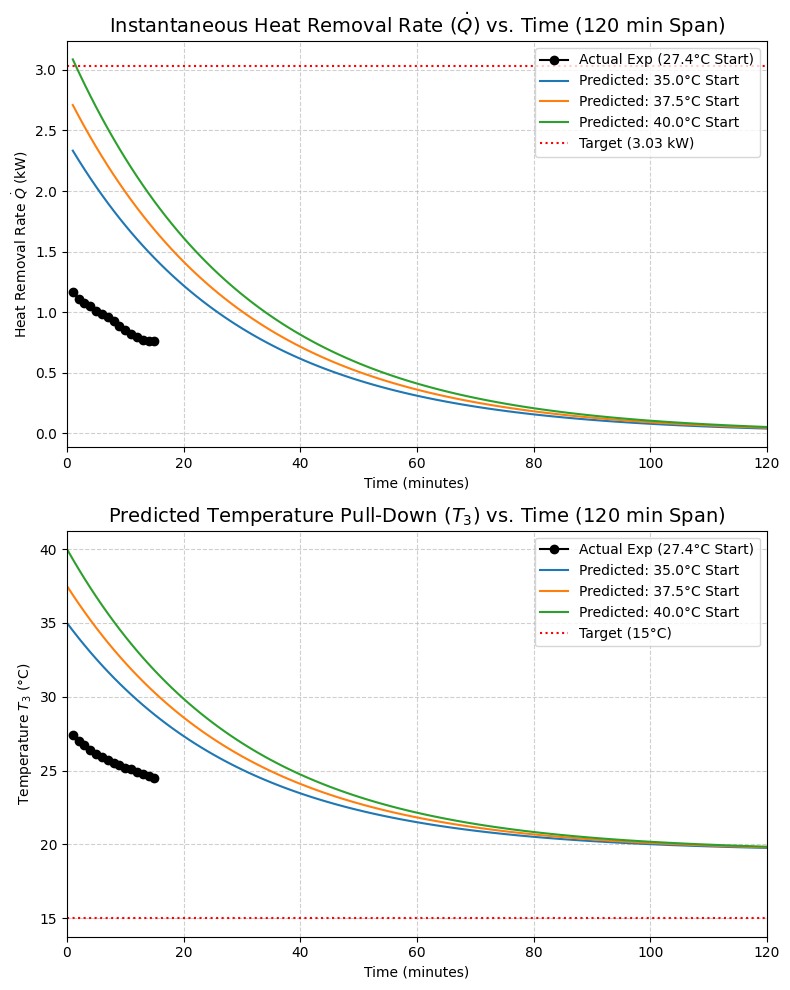

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1. Original Experimental Data (Exp 02)
time_obs = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
t3_obs = np.array([27.4, 27.0, 26.7, 26.4, 26.1, 25.9, 25.7, 25.5, 25.4, 25.2, 25.1, 24.9, 24.8, 24.6, 24.5])
q_dot_obs = np.array([1.169, 1.111, 1.077, 1.054, 1.011, 0.985, 0.963, 0.925, 0.884, 0.852, 0.821, 0.795, 0.771, 0.765, 0.762])

# 2. Derive Calibrated Room Mass (C_exp)
avg_q = np.mean(q_dot_obs)
temp_drop_rate = (t3_obs[0] - t3_obs[-1]) / (time_obs[-1] - time_obs[0])
C_exp = (avg_q * 60) / temp_drop_rate # kJ/K

# 3. Mathematical Model (Q as function of T3)
model = LinearRegression().fit(t3_obs.reshape(-1, 1), q_dot_obs)
m, c = model.coef_[0], model.intercept_

# 4. Simulation Function (120 mins)
def simulate_full(T_start, duration=120):
    Q_history = []
    T_history = [T_start]
    T_curr = T_start
    for _ in range(duration):
        Q_inst = m * T_curr + c
        Q_history.append(Q_inst)
        T_curr -= (Q_inst * 60) / C_exp
        T_history.append(T_curr)
    return T_history, Q_history

# 5. Plotting vertically stacked with Raw Strings (r'') to fix SyntaxWarnings
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

# --- Subplot 1: Heat Removal Rate (Q) ---
ax1.plot(time_obs, q_dot_obs, 'ko-', label='Actual Exp (27.4°C Start)')
sim_time_q = np.arange(1, 121)
for start in [35.0, 37.5, 40.0]:
    _, q_hist = simulate_full(start, duration=120)
    ax1.plot(sim_time_q, q_hist, label=f'Predicted: {start}°C Start')

ax1.axhline(y=3.03, color='red', linestyle=':', label='Target (3.03 kW)')
# Use r'string' to handle LaTeX backslashes correctly
ax1.set_title(r'Instantaneous Heat Removal Rate ($\dot{Q}$) vs. Time (120 min Span)', fontsize=14)
ax1.set_xlabel('Time (minutes)')
ax1.set_ylabel(r'Heat Removal Rate $\dot{Q}$ (kW)')
ax1.set_xlim(0, 120)
ax1.legend(loc='upper right')
ax1.grid(True, linestyle='--', alpha=0.6)

# --- Subplot 2: Temperature (T3) ---
ax2.plot(time_obs, t3_obs, 'ko-', label='Actual Exp (27.4°C Start)')
sim_time_t = np.arange(0, 121)
for start in [35.0, 37.5, 40.0]:
    t_hist, _ = simulate_full(start, duration=120)
    ax2.plot(sim_time_t, t_hist, label=f'Predicted: {start}°C Start')

ax2.axhline(y=15, color='red', linestyle=':', label='Target (15°C)')
ax2.set_title(r'Predicted Temperature Pull-Down ($T_3$) vs. Time (120 min Span)', fontsize=14)
ax2.set_xlabel('Time (minutes)')
ax2.set_ylabel(r'Temperature $T_3$ (°C)')
ax2.set_xlim(0, 120)
ax2.legend(loc='upper right')
ax2.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

Therefore it can be confidently claimed that the air conditioning unit in the laboratory is not capable of cooling the storage within the specified period of time of 2hrs under any circumstances.

---

#Question

### Determine the developments required to be introduced for the unit if required to store 80 milk containers per day.

### Scaling Analysis: Requirements for 80 Milk Containers

To accommodate a doubling of the daily intake to 80 containers, the system's thermal capacity must be scaled accordingly. The total thermal mass increases to approximately $1747.4 \text{ kJ/K}$. To achieve the required temperature drop of $25^\circ\text{C}$ within the mandatory 2-hour window, the mean cooling capacity must reach:

$$\dot{Q}_{80} = \frac{1747.4 \times 25}{7200} \approx 6.06 \text{ kW}$$

Given that the current laboratory unit demonstrated a simulated mean capacity of approximately $1.24 - 1.68 \text{ kW}$ under design conditions, the following developments are proposed to bridge the $4.5 \text{ kW}$ deficit:

* **Capacity Expansion:** Installation of a secondary refrigeration circuit or upgrading the existing compressor and evaporator to a unit with a minimum cooling duty of $7 \text{ kW}$ (including a $15\%$ safety factor for wall heat gain).
* **Air Distribution Optimization:** Implementation of a forced-convection ducting system. With 80 containers, "dead zones" in airflow are likely; a high-velocity blower is required to ensure uniform cooling across the increased bulk.
* **Thermal Energy Storage (TES):** To handle the high initial sensible heat load at 1400 hrs without oversized equipment, an ice-bank or chilled-water storage system is recommended. This allows the unit to store "coolth" during off-peak hours and discharge it rapidly during the 2-hour pull-down period.
* **Infiltration Control:** Use of strip curtains or an air-lock entry system to minimize the significant infiltration load expected during the extended loading time required for 80 containers.

---

# REFERENCES

* Engineering Toolbox (2020). Air Change Rates in typical Rooms and Buildings. [online] Engineeringtoolbox.com. Available at: https://www.engineeringtoolbox.com/air-change-rate-room-d_867.html.

* Draper, M.W. and Nissenson, R.A. (1982). Parathyroid Hormone. S. Karger AG (Switzerland).Available at:https://assets.danfoss.com/documents/latest/184239/BC380553550476en-000101.pdf